In [1]:
# Jupyter notebook setup

import re
import math
import json
import datetime as dt
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# === jupyter notebook config === 
# Show all output values in cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# === numpy & pandas config ===
np.set_printoptions(linewidth=240)
np.set_printoptions(threshold=np.inf)

pd.set_option('max_colwidth', 100)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{:,.2f}'.format)

# === graphs config ===
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 17, 8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.weight'] = 'normal'

plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.style.use('bmh')
plt.style.use('fivethirtyeight')

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [6]:
import os

li = []

for root, directories, filenames in os.walk('./quotes'):
    for filename in filenames:
        df = pd.read_csv(os.path.join(root,filename), index_col=None, header=0)
        li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [16]:
df.shape
df.head()

(31232, 37)

ACCINT  ADMITTEDQUOTE  ADMITTEDVALUE  BEICLOSE BOARDID BUYBACKDATE  CLOSE  \
0     nan         139.00           0.00       nan    TQBR         NaN 139.00   
1     nan           6.32           0.00       nan    TQDE         NaN   6.32   
2     nan            nan           0.00       nan    SMAL         NaN  10.05   
3     nan           9.90 101,711,296.70       nan    TQBR         NaN   9.90   
4     nan            nan           0.00       nan    SMAL         NaN  97.64   

   COUPONPERCENT  COUPONVALUE CURRENCYID  DURATION FACEUNIT  FACEVALUE   HIGH  \
0            nan          nan        NaN       nan      NaN        nan 139.00   
1            nan          nan        NaN       nan      NaN        nan   6.34   
2            nan          nan        NaN       nan      NaN        nan  10.08   
3            nan          nan        NaN       nan      NaN        nan   9.95   
4            nan          nan        NaN       nan      NaN        nan  98.32   

   IRICPICLOSE LASTTRADEDATE  LEGALCLOSEPRICE    LOW  MARKETPRICE2  \
0          nan           NaN           139.00 137.50           nan   
1          nan           NaN             6.32   6.32           nan   
2          nan           NaN              nan  10.05           nan   
3          nan           NaN             9.90   9.85          9.91   
4          nan           NaN              nan  94.04           nan   

   MARKETPRICE3  MARKETPRICE3TRADESVALUE MATDATE      MP2VALTRD  NUMTRADES  \
0        139.00               513,690.00     NaN           0.00      10.00   
1          6.54               503,400.00     NaN           0.00       2.00   
2           nan                     0.00     NaN           0.00       3.00   
3          9.91           101,711,296.70     NaN 101,711,296.70   3,600.00   
4           nan                     0.00     NaN           0.00       7.00   

  OFFERDATE   OPEN SECID   SHORTNAME   TRADEDATE          VALUE        VOLUME  \
0       NaN 139.00  ABRD  АбрауДюрсо  2019-03-04      42,995.00        310.00   
1       NaN   6.34  ACKO     АСКО ао  2019-03-04      18,980.00      3,000.00   
2       NaN  10.08  AFKS  Система ао  2019-03-04         110.71         11.00   
3       NaN   9.85  AFKS  Система ао  2019-03-04 101,711,296.70 10,266,300.00   
4       NaN  94.04  AFLT    Аэрофлот  2019-03-04       1,921.18         20.00   

   WAPRICE  WAVAL  YIELDATWAP  YIELDCLOSE  YIELDLASTCOUPON  YIELDTOOFFER  
0   138.50    nan         nan         nan              nan           nan  
1     6.34    nan         nan         nan              nan           nan  
2     9.91    nan         nan         nan              nan           nan  
3     9.91    nan         nan         nan              nan           nan  
4    98.08    nan         nan         nan              nan           nan

In [18]:
yndx = df[(df.BOARDID == 'TQBR') & (df.SECID == 'YNDX')].sort_values(by='TRADEDATE')
yndx.dropna(axis=1, how='all')[['OPEN', 'CLOSE', 'VOLUME', 'TRADEDATE']]

OPEN    CLOSE       VOLUME   TRADEDATE
21738 1,918.50 1,859.50   148,487.00  2019-01-03
22229 1,861.50 1,916.00   187,797.00  2019-01-04
28234 1,933.00 1,926.50   114,452.00  2019-01-08
26758 1,936.50 1,960.00   133,630.00  2019-01-09
25763 1,970.50 1,985.00   142,546.00  2019-01-10
23222 1,983.00 1,983.00   101,638.00  2019-01-11
30225 1,985.00 1,992.50   107,716.00  2019-01-14
29725 1,993.50 1,999.50   190,886.00  2019-01-15
24254 1,997.50 1,980.00   179,500.00  2019-01-16
25274 1,979.50 1,993.50   154,687.00  2019-01-17
22733 2,024.00 2,044.50   277,420.00  2019-01-18
26263 2,048.50 2,044.50    48,804.00  2019-01-21
30727 2,033.00 2,051.00   138,732.00  2019-01-22
29229 2,039.00 2,060.00   190,116.00  2019-01-23
28738 2,057.00 2,083.00   217,522.00  2019-01-24
31227 2,099.50 2,152.00   278,632.00  2019-01-25
24753 2,170.00 2,167.00   305,057.00  2019-01-28
23721 2,176.50 2,152.00   156,601.00  2019-01-29
27745 2,147.00 2,157.00   131,154.00  2019-01-30
27247 2,180.50 2,212.00   264,189.00  2019-01-31
17702 2,200.20 2,197.20   169,741.00  2019-02-01
11585 2,195.00 2,212.00    83,835.00  2019-02-04
12080 2,220.00 2,250.80   222,590.00  2019-02-05
18192 2,261.00 2,244.00   130,657.00  2019-02-06
16707 2,230.80 2,192.20   139,310.00  2019-02-07
17211 2,189.00 2,163.40   132,679.00  2019-02-08
14161 2,170.00 2,196.00   166,813.00  2019-02-11
19182 2,206.00 2,230.00   177,278.00  2019-02-12
19680 2,233.00 2,258.00   385,668.00  2019-02-13
20184 2,229.00 2,264.00   336,454.00  2019-02-14
18686 2,290.00 2,200.20 1,081,955.00  2019-02-15
13148 2,140.00 2,161.00   683,691.00  2019-02-18
15155 2,169.80 2,126.60   574,622.00  2019-02-19
12653 2,161.00 2,166.20   281,378.00  2019-02-20
16211 2,167.00 2,115.00   222,203.00  2019-02-21
20692 2,108.00 2,133.00   252,076.00  2019-02-22
21212 2,181.00 2,214.60   393,776.00  2019-02-25
15662 2,198.00 2,169.60   136,769.00  2019-02-26
13654 2,177.80 2,163.00   158,283.00  2019-02-27
14658 2,165.00 2,208.00   171,973.00  2019-02-28
6196  2,235.60 2,247.40   329,179.00  2019-03-01
459   2,260.00 2,303.60   204,278.00  2019-03-04
934   2,290.40 2,340.20   178,112.00  2019-03-05
6666  2,355.00 2,362.00   238,266.00  2019-03-06
5685  2,363.00 2,329.20   132,912.00  2019-03-07
2846  2,320.00 2,346.40    94,106.00  2019-03-11
7626  2,369.00 2,355.00    79,477.00  2019-03-12
8101  2,349.60 2,345.00    90,222.00  2019-03-13
8580  2,344.80 2,303.40    89,290.00  2019-03-14
7147  2,325.00 2,352.80    85,803.00  2019-03-15
1888  2,354.80 2,306.00   252,612.00  2019-03-18
4261  2,323.80 2,318.80    70,620.00  2019-03-19
1407  2,318.80 2,301.40    97,547.00  2019-03-20
5211  2,299.80 2,274.00   464,428.00  2019-03-21
9047  2,290.00 2,276.40   113,230.00  2019-03-22
9524  2,274.00 2,293.80   102,835.00  2019-03-25
4735  2,295.00 2,315.80    94,399.00  2019-03-26
2364  2,306.60 2,268.00   109,702.00  2019-03-27
3783  2,270.00 2,317.80   163,395.00  2019-03-28
3311  2,332.20 2,293.60   199,349.00  2019-03-29

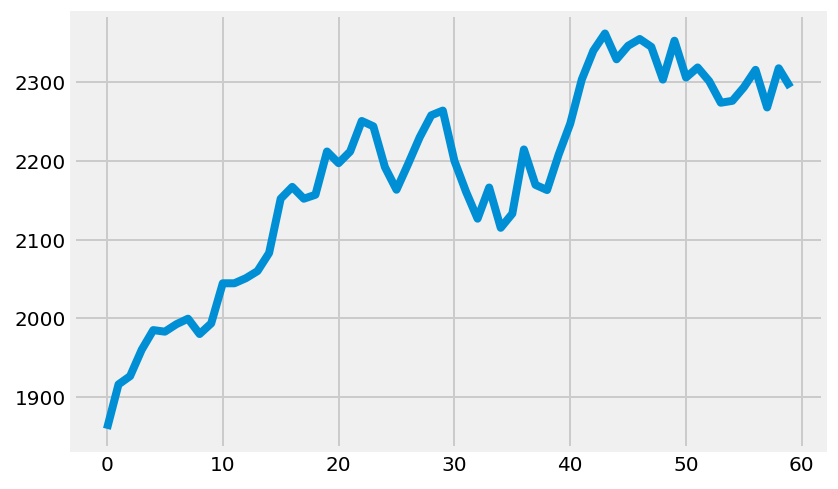

In [24]:
plt.plot(list(yndx.CLOSE))

In [24]:
df = pd.read_csv('quotes/NASDAQ/YNDX/YNDX_data.csv')
df.shape
df.head()

(1976, 9)

timestamp  open  high   low  close  adjusted_close    volume  \
0  2011-05-24 35.00 42.01 30.55  38.84           38.84  70186700   
1  2011-05-25 37.75 37.90 34.40  35.00           35.00  11761600   
2  2011-05-26 34.45 35.45 34.00  34.77           34.77   4417500   
3  2011-05-27 34.75 35.00 34.00  34.45           34.45   2006000   
4  2011-05-31 34.95 35.37 32.61  33.45           33.45   3981100   

   dividend_amount  split_coefficient  
0             0.00               1.00  
1             0.00               1.00  
2             0.00               1.00  
3             0.00               1.00  
4             0.00               1.00

In [27]:
df['date_field'] = df.timestamp.apply(lambda x: int(datetime.strptime(x, '%Y-%m-%d').timestamp()) * 1000)
df.head()

timestamp  open  high   low  close  adjusted_close    volume  \
0  2011-05-24 35.00 42.01 30.55  38.84           38.84  70186700   
1  2011-05-25 37.75 37.90 34.40  35.00           35.00  11761600   
2  2011-05-26 34.45 35.45 34.00  34.77           34.77   4417500   
3  2011-05-27 34.75 35.00 34.00  34.45           34.45   2006000   
4  2011-05-31 34.95 35.37 32.61  33.45           33.45   3981100   

   dividend_amount  split_coefficient     date_field  
0             0.00               1.00  1306180800000  
1             0.00               1.00  1306267200000  
2             0.00               1.00  1306353600000  
3             0.00               1.00  1306440000000  
4             0.00               1.00  1306785600000

In [32]:
df[['date_field', 'close']].values.tolist()[:5]

[[1306180800000.0, 38.84],
 [1306267200000.0, 35.0],
 [1306353600000.0, 34.77],
 [1306440000000.0, 34.45],
 [1306785600000.0, 33.45]]

In [2]:
df = pd.read_csv('quotes/2019/04/02/2019-04-02-stock-bonds.csv')
df.shape
df.head()

(575, 37)

BOARDID   TRADEDATE   SHORTNAME         SECID  NUMTRADES        VALUE  \
0    EQOB  2019-04-02  Газпрнефт4  RU000A0JQ557       1.00    10,180.00   
1    EQOB  2019-04-02   РЖД-12обл  RU000A0JQ5Q5       3.00   159,873.00   
2    EQOB  2019-04-02  РЖД-19 обл  RU000A0JQ7Z2       1.00 1,745,800.00   
3    EQOB  2019-04-02  Транснф 03  RU000A0JQCR1       2.00     9,108.00   
4    EQOB  2019-04-02      РСХБ 8  RU000A0JQK64       2.00    59,905.00   

     LOW   HIGH  CLOSE  LEGALCLOSEPRICE  ACCINT  WAPRICE  YIELDCLOSE   OPEN  \
0 101.80 101.80 101.80           100.50    0.48   101.80      -60.49 101.80   
1  99.30  99.30  99.30            99.30    0.38    99.30        6.10  99.30   
2  99.76  99.76  99.76            99.76   15.49    99.76        8.22  99.76   
3 101.20 101.20 101.20           101.20   64.38   101.20        8.99 101.20   
4  99.30  99.95  99.95            99.95   26.47    99.84        7.19  99.30   

    VOLUME  MARKETPRICE2  MARKETPRICE3  ADMITTEDQUOTE      MP2VALTRD  \
0    10.00           nan        100.54         100.50           0.00   
1   161.00           nan         99.06          99.30           0.00   
2 1,750.00         99.74         99.75          99.76 236,212,336.50   
3     9.00        102.22        102.22         101.20     574,484.80   
4    60.00           nan         99.74          99.95           0.00   

   MARKETPRICE3TRADESVALUE  ADMITTEDVALUE     MATDATE  DURATION  YIELDATWAP  \
0               574,100.30           0.00  2019-04-09      7.00      -60.49   
1               620,106.30           0.00  2019-05-16     44.00        6.10   
2            47,815,868.80 236,212,336.50  2024-07-08    104.00        8.22   
3               571,432.80     574,484.80  2019-09-18    169.00        8.99   
4               656,299.50           0.00  2019-11-14    220.00        7.38   

   IRICPICLOSE  BEICLOSE  COUPONPERCENT  COUPONVALUE BUYBACKDATE  \
0          nan       nan            nan         0.50         NaN   
1          nan       nan            nan         0.50         NaN   
2          nan       nan            nan        36.15  2019-07-15   
3          nan       nan            nan       120.17         NaN   
4          nan       nan            nan        34.90         NaN   

  LASTTRADEDATE  FACEVALUE CURRENCYID  CBRCLOSE  YIELDTOOFFER  \
0    2019-04-02   1,000.00        SUR       nan           nan   
1    2019-04-02   1,000.00        SUR       nan           nan   
2    2019-04-02   1,000.00        SUR       nan          8.06   
3    2019-04-02   1,000.00        SUR       nan           nan   
4    2019-04-02   1,000.00        SUR       nan           nan   

   YIELDLASTCOUPON   OFFERDATE FACEUNIT  
0           -92.05         NaN      RUB  
1             5.95         NaN      RUB  
2              nan  2019-07-17      RUB  
3             8.79         NaN      RUB  
4              nan         NaN      RUB

In [26]:
any([isinstance(x, (list, tuple)) for x in flt.values()])

True

In [35]:
from copy import deepcopy

def get_multiple_filters(original_filters):
    """Разбивает словарь с массивом в значении любого ключа на несколько объектов со скалярными значениями"""
    # сначала составляем словарь из скалярных фильтров
    new_filter = {k:v
                  for k, v in original_filters.items()
                  if not isinstance(v, (list, tuple))}

    for key, value in original_filters.items():
        if isinstance(value, (list, tuple)):
            for item in value:
                flt = deepcopy(new_filter)
                flt[key] = item
                yield flt

print(list(get_multiple_filters(flt)))


[{'SHORTNAME': 'ГрузЦ БОП1', 'BOARDID': 'EQOB'}, {'SHORTNAME': 'ГрузЦ БОП2', 'BOARDID': 'EQOB'}]


In [47]:
import json
json.dumps(["1","2","3"])

[]

'["1", "2", "3"]'

In [73]:
def build_filter_string(filters):
    parts = []
    for key, value in filters.items():
        if isinstance(value, (list, tuple)):
            parts.append('({key} in {value})'.format(key=key, value=json.dumps(value, ensure_ascii=False)))
        else:
            parts.append('({key} == "{value}")'.format(key=key, value=value))
    return ' and '.join(parts)

def filter_data(df, filters):
    filters_string = build_filter_string(filters)
    return df.query(filters_string)
#     if not any([isinstance(x, (list, tuple)) for x in flt.values()]):
#         # если все значения фильтров — скаляры, строки
#         return df.loc[(df[list(filters)] == pd.Series(filters)).all(axis=1)]
#     return 12312

flt = {
    'BOARDID': 'EQOB',
    # 'SHORTNAME': 'ГрузЦ БОП1',
    'SHORTNAME': ['ГрузЦ БОП2', 'ГрузЦ БОП1', 'ГрузЦ БОП3'],
}

filter_data(df, flt)

BOARDID   TRADEDATE   SHORTNAME         SECID  NUMTRADES      VALUE  \
363    EQOB  2019-04-02  ГрузЦ БОП1  RU000A0ZZ0R3       4.00 419,375.00   
431    EQOB  2019-04-02  ГрузЦ БОП2  RU000A0ZZV03      12.00 592,860.00   

       LOW   HIGH  CLOSE  LEGALCLOSEPRICE  ACCINT  WAPRICE  YIELDCLOSE   OPEN  \
363 104.31 104.92 104.92           104.92  116.44   104.84       12.27 104.31   
431 103.97 104.19 103.99           103.99   41.10   104.01       12.98 103.97   

     VOLUME  MARKETPRICE2  MARKETPRICE3  ADMITTEDQUOTE    MP2VALTRD  \
363    8.00        105.38        104.64         104.92 1,580,745.00   
431   57.00        104.01        104.01         103.99   592,860.00   

     MARKETPRICE3TRADESVALUE  ADMITTEDVALUE     MATDATE  DURATION  YIELDATWAP  \
363               837,140.00   1,580,745.00  2020-03-22    330.00       12.36   
431               592,860.00     592,860.00  2020-11-12    527.00       12.97   

     IRICPICLOSE  BEICLOSE  COUPONPERCENT  COUPONVALUE BUYBACKDATE  \
363          nan       nan            nan       698.63         NaN   
431          nan       nan            nan       123.29         NaN   

    LASTTRADEDATE  FACEVALUE CURRENCYID  CBRCLOSE  YIELDTOOFFER  \
363    2019-04-02  50,000.00        SUR       nan           nan   
431    2019-04-02  10,000.00        SUR       nan           nan   

     YIELDLASTCOUPON   OFFERDATE FACEUNIT  
363              nan  2019-04-02      RUB  
431              nan         NaN      RUB

In [40]:
df.query("(SHORTNAME == 'ГрузЦ БОП1') or (SHORTNAME == 'ГрузЦ БОП2')")

BOARDID   TRADEDATE   SHORTNAME         SECID  NUMTRADES      VALUE  \
363    EQOB  2019-04-02  ГрузЦ БОП1  RU000A0ZZ0R3       4.00 419,375.00   
431    EQOB  2019-04-02  ГрузЦ БОП2  RU000A0ZZV03      12.00 592,860.00   

       LOW   HIGH  CLOSE  LEGALCLOSEPRICE  ACCINT  WAPRICE  YIELDCLOSE   OPEN  \
363 104.31 104.92 104.92           104.92  116.44   104.84       12.27 104.31   
431 103.97 104.19 103.99           103.99   41.10   104.01       12.98 103.97   

     VOLUME  MARKETPRICE2  MARKETPRICE3  ADMITTEDQUOTE    MP2VALTRD  \
363    8.00        105.38        104.64         104.92 1,580,745.00   
431   57.00        104.01        104.01         103.99   592,860.00   

     MARKETPRICE3TRADESVALUE  ADMITTEDVALUE     MATDATE  DURATION  YIELDATWAP  \
363               837,140.00   1,580,745.00  2020-03-22    330.00       12.36   
431               592,860.00     592,860.00  2020-11-12    527.00       12.97   

     IRICPICLOSE  BEICLOSE  COUPONPERCENT  COUPONVALUE BUYBACKDATE  \
363          nan       nan            nan       698.63         NaN   
431          nan       nan            nan       123.29         NaN   

    LASTTRADEDATE  FACEVALUE CURRENCYID  CBRCLOSE  YIELDTOOFFER  \
363    2019-04-02  50,000.00        SUR       nan           nan   
431    2019-04-02  10,000.00        SUR       nan           nan   

     YIELDLASTCOUPON   OFFERDATE FACEUNIT  
363              nan  2019-04-02      RUB  
431              nan         NaN      RUB

In [61]:
flt

{'BOARDID': 'EQOB', 'SHORTNAME': ['ГрузЦ БОП1', 'ГрузЦ БОП2', 'ГрузЦ БОП3']}

In [74]:
gruz = filter_data(df, flt)
gruz

BOARDID   TRADEDATE   SHORTNAME         SECID  NUMTRADES      VALUE  \
363    EQOB  2019-04-02  ГрузЦ БОП1  RU000A0ZZ0R3       4.00 419,375.00   
431    EQOB  2019-04-02  ГрузЦ БОП2  RU000A0ZZV03      12.00 592,860.00   

       LOW   HIGH  CLOSE  LEGALCLOSEPRICE  ACCINT  WAPRICE  YIELDCLOSE   OPEN  \
363 104.31 104.92 104.92           104.92  116.44   104.84       12.27 104.31   
431 103.97 104.19 103.99           103.99   41.10   104.01       12.98 103.97   

     VOLUME  MARKETPRICE2  MARKETPRICE3  ADMITTEDQUOTE    MP2VALTRD  \
363    8.00        105.38        104.64         104.92 1,580,745.00   
431   57.00        104.01        104.01         103.99   592,860.00   

     MARKETPRICE3TRADESVALUE  ADMITTEDVALUE     MATDATE  DURATION  YIELDATWAP  \
363               837,140.00   1,580,745.00  2020-03-22    330.00       12.36   
431               592,860.00     592,860.00  2020-11-12    527.00       12.97   

     IRICPICLOSE  BEICLOSE  COUPONPERCENT  COUPONVALUE BUYBACKDATE  \
363          nan       nan            nan       698.63         NaN   
431          nan       nan            nan       123.29         NaN   

    LASTTRADEDATE  FACEVALUE CURRENCYID  CBRCLOSE  YIELDTOOFFER  \
363    2019-04-02  50,000.00        SUR       nan           nan   
431    2019-04-02  10,000.00        SUR       nan           nan   

     YIELDLASTCOUPON   OFFERDATE FACEUNIT  
363              nan  2019-04-02      RUB  
431              nan         NaN      RUB

In [75]:
result = []
for name in flt['SHORTNAME']:
    print(name)
    value = gruz.loc[gruz.SHORTNAME == name]['CLOSE']
    result.append(float(value) if len(value) else None)
    print(len(value))

result

ГрузЦ БОП2
1
ГрузЦ БОП1
1
ГрузЦ БОП3
0


[103.99, 104.92, None]

In [ ]:
[x for x in flt['SHORTNAME']]